# Intro to Probability
https://www.amazon.com/Introduction-Probability-Chapman-Statistical-Science/dp/1466575573

## Chap 12. Markov Chain Monte Carlo (MCMC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

plt.style.use('seaborn')

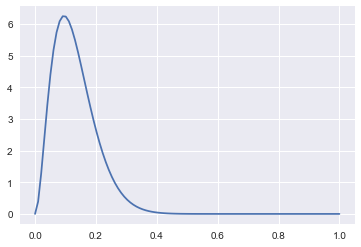

In [2]:
from scipy.stats import beta

x = np.linspace(0, 1, num=100)
plt.plot(x, beta.pdf(x, a=3, b=20))
plt.show()

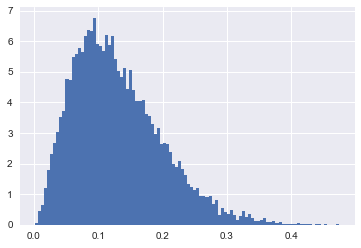

In [3]:
# Sampling using a built-in tool: `np.random`

x = np.random.beta(3, 20, size=10000)
plt.hist(x, bins=100, histtype='stepfilled', density=True)
plt.show()

In [4]:
# Sampling using Metropolis-Hastings
from scipy.stats import norm
from scipy.stats import uniform

cache_denominator = {}
def gamma(n):
    return math.factorial(n - 1)

def f_beta(x, a, b):
    nominator = np.power(x, a - 1) * np.power(1 - x, b - 1)
    denominator = cache_denominator.get((a, b))
    if not denominator:
        denominator = gamma(a) * gamma(b) / gamma(a + b)
        cache_denominator[(a, b)] = denominator
    return nominator / denominator

def proposal_dist(x, prev):
    #return norm.pdf(x=x, loc=prev)
    return uniform.pdf(x)

def sample_from_proposal_dist(prev):
    #return np.random.normal(loc=prev)
    return np.random.uniform()

def sample(a, b, n_iterations=1000):
    trace = {}
    samples = np.zeros(n_iterations)
    acceptance_probs = np.zeros(n_iterations)
    prev = np.random.uniform() # Initial value
    for i in range(n_iterations):
        # 1. Random from proposal distribution
        x = sample_from_proposal_dist(prev)
        
        # 2. Calculate acceptance probability
        acceptance_prob = min(1, f_beta(x, a, b) / f_beta(prev, a, b))
        #acceptance_prob = min(1, (f_beta(x, a, b) / f_beta(prev, a, b)) * (proposal_dist(prev, x) / proposal_dist(x, prev)))
        
        # 3. Accept or reject
        prev = x if np.random.uniform() <= acceptance_prob else prev

        samples[i] = prev
        acceptance_probs[i] = acceptance_prob
    
    trace['samples'] = samples
    trace['acceptance_probs'] = acceptance_probs
    return trace

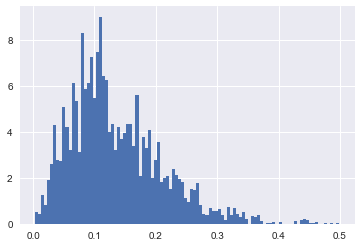

In [5]:
trace = sample(3, 20, n_iterations=5000)
samples = trace['samples']
plt.hist(samples, bins=100, histtype='stepfilled', density=True)
plt.show()

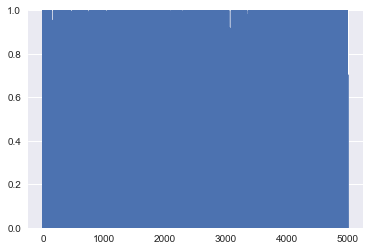

In [6]:
acceptance_probs = trace['acceptance_probs']
plt.plot(acceptance_probs)
plt.gca().set_ylim((0, 1))
plt.show()